# Introduction

This tutorial focuses on implementation of three reqularisaion techniques, two of them are norm based approaches which are added to optimised objective and the third technique, called *droput*, is a form of noise injection by random corruption of information carried by hidden units during training.


## Virtual environments

Before you proceed onwards, remember to activate your virtual environment:
   * If you were in last week's Tuesday or Wednesday group type `activate_mlp` or `source ~/mlpractical/venv/bin/activate`
   * If you were in the Monday group:
      + and if you have chosen the **comfy** way type: `workon mlpractical`
      + and if you have chosen the **generic** way, `source` your virutal environment using `source` and specyfing the path to the activate script (you need to localise it yourself, there were not any general recommendations w.r.t dir structure and people have installed it in different places, usually somewhere in the home directories. If you cannot easily find it by yourself, use something like: `find . -iname activate` ):

## Syncing the git repository

Look <a href="https://github.com/CSTR-Edinburgh/mlpractical/blob/master/gitFAQ.md">here</a> for more details. But in short, we recommend to create a separate branch for this lab, as follows:

1. Enter the mlpractical directory `cd ~/mlpractical/repo-mlp`
2. List the branches and check which is currently active by typing: `git branch`
3. If you have followed our recommendations, you should be in the `coursework1` branch, please commit your local changed to the repo index by typing:
```
git commit -am "finished coursework"
```
4. Now you can switch to `master` branch by typing: 
```
git checkout master
 ```
5. To update the repository (note, assuming master does not have any conflicts), if there are some, have a look <a href="https://github.com/CSTR-Edinburgh/mlpractical/blob/master/gitFAQ.md">here</a>
```
git pull
```
6. And now, create the new branch & swith to it by typing:
```
git checkout -b lab4
```

# Regularisation

Regularisation add some *complexity term* to the cost function. It's purpose is to put some prior on the model's parameters. The most common prior is perhaps the one which assumes smoother solutions (the one which are not able to fit training data too well) are better as they are more likely to better generalise to unseen data. 

A way to incorporate such prior in the model is to add some term that penalise certain configurations of the parameters -- either from growing too large ($L_2$) or the one that prefers solution that could be modelled with less parameters ($L_1$), hence encouraging some parameters to become 0. One can, of course, combine many such priors when optimising the model, however, in the lab we shall use $L_1$ and/or $L_2$ priors.

They can be easily incorporated into the training objective by adding some additive terms, as follows:

(1) $
 \begin{align*}
        E^n &= \underbrace{E^n_{\text{train}}}_{\text{data term}} + 
    \underbrace{\beta_{L_1} E^n_{L_1}}_{\text{prior term}} + \underbrace{\beta_{L_2} E^n_{L_2}}_{\text{prior term}}
\end{align*}
$

where $ E^n_{\text{train}} = - \sum_{k=1}^K t^n_k \ln y^n_k $,  $\beta_{L_1}$ and $\beta_{L_2}$ some non-negative constants specified a priori (hyper-parameters) and $E^n_{L_1}$ and $E^n_{L_2}$ norm metric specifying certain properties of parameters:

(2) $
 \begin{align*}
 E^n_{L_p}(\mathbf{W}) = \left ( \sum_{i,j \in \mathbf{W}} |w_{i,j}|^p \right )^{\frac{1}{p}}
\end{align*}
$

where $p$ denotes the norm-order (for regularisation either 1 or 2). (TODO: explain here why we usualy skip square root for p=2)

## $L_{p=2}$ (Weight Decay)

(3) $
 \begin{align*}
        E^n &= \underbrace{E^n_{\text{train}}}_{\text{data term}} + 
    \underbrace{\beta E^n_{L_2}}_{\text{prior term}} = E^n_{\text{train}} + \beta_{L_2} \frac{1}{2}|w_i|^2
\end{align*}
$

(4) $
\begin{align*}\frac{\partial E^n}{\partial w_i} &= \frac{\partial (E^n_{\text{train}} + \beta_{L_2} E_{L_2}) }{\partial w_i} 
  = \left( \frac{\partial E^n_{\text{train}}}{\partial w_i}  + \beta_{L_2} \frac{\partial
      E_{L_2}}{\partial w_i} \right) 
  = \left( \frac{\partial E^n_{\text{train}}}{\partial w_i}  + \beta_{L_2} w_i \right)
\end{align*}
$

(5) $
\begin{align*}
  \Delta w_i &= -\eta \left( \frac{\partial E^n_{\text{train}}}{\partial w_i}  + \beta_{L_2} w_i \right) 
\end{align*}
$

where $\eta$ is learning rate.

## $L_{p=1}$ (Sparsity)

(6) $
 \begin{align*}
        E^n &= \underbrace{E^n_{\text{train}}}_{\text{data term}} + 
    \underbrace{\beta E^n_{L_1}}_{\text{prior term}} 
        = E^n_{\text{train}} + \beta_{L_1} |w_i|
\end{align*}
$

(7) $\begin{align*}
  \frac{\partial E^n}{\partial w_i} =  \frac{\partial E^n_{\text{train}}}{\partial w_i}  + \beta_{L_1} \frac{\partial E_{L_1}}{\partial w_i}  =  \frac{\partial E^n_{\text{train}}}{\partial w_i}  + \beta_{L_1}  \mbox{sgn}(w_i)
\end{align*}
$

(8) $\begin{align*}
  \Delta w_i &= -\eta \left( \frac{\partial E^n_{\text{train}}}{\partial w_i}  + \beta_{L_1} \mbox{sgn}(w_i) \right) 
\end{align*}$

Where $\mbox{sgn}(w_i)$ is the sign of $w_i$: $\mbox{sgn}(w_i) = 1$ if $w_i>0$ and $\mbox{sgn}(w_i) = -1$ if $w_i<0$

One can also apply those penalty terms for biases, however, this is usually not necessary as biases have secondary impact on smoothnes of the given solution.

## Dropout

Dropout, for a given layer's output $\mathbf{h}^i \in \mathbb{R}^{BxH^l}$ (where $B$ is batch size and $H^l$ is the $l$-th layer output dimensionality) implements the following transformation:

(9) $\mathbf{\hat h}^l = \mathbf{d}^l\circ\mathbf{h}^l$

where $\circ$ denotes an elementwise product and $\mathbf{d}^l \in \{0,1\}^{BxH^i}$ is a matrix in which $d^l_{ij}$ element is sampled from the Bernoulli distribution:

(10) $d^l_{ij} \sim \mbox{Bernoulli}(p^l_d)$

with $0<p^l_d<1$ denoting the probability the given unit is kept unchanged (dropping probability is thus $1-p^l_d$). We ignore here edge scenarios where $p^l_d=1$ and there is no dropout applied (and the training would be exactly the same as in standard SGD) and $p^l_d=0$ where all units would have been dropped, hence the model would not learn anything.

The probability $p^l_d$ is a hyperparameter (like learning rate) meaning it needs to be provided before training and also very often tuned for the given task. As the notation suggest, it can be specified separately for each layer, including scenario where $l=0$ when some random input features (pixels in the image for MNIST) are being also ommitted.

### Keeping the $l$-th layer output $\mathbf{\hat h}^l$ (input to the upper layer) appropiately scaled at test-time

The other issue one needs to take into account is the mismatch that arises between training and test (runtime) stages when dropout is applied. It is due to the fact that droput is not applied when testing hence the average input to the unit in upper layer is going to be bigger when compared to training stage (where some inputs are set to 0), in average $1/p^l_d$ times bigger. 

So to account for this mismatch one could either:

1. When training is finished scale the final weight matrices $\mathbf{W}^l, l=1,\ldots,L$ by $p^{l-1}_d$ (remember, $p^{0}_d$ is the probability related to the input features)
2. Scale the activations in equation (9) during training, that is, for each mini-batch multiply $\mathbf{\hat h}^l$ by $1/p^l_d$ to compensate for dropped units and then at run-time use the model as usual, **without** scaling. Make sure the $1/p^l_d$ scaler is taken into account for both forward and backward passes.


Our recommendation is option 2 as it will make some things easier from implementation perspective. 

In [1]:
import numpy
import logging
from mlp.dataset import MNISTDataProvider

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info('Initialising data providers...')

train_dp = MNISTDataProvider(dset='train', batch_size=10, max_num_batches=100, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

INFO:root:Initialising data providers...


In [3]:
#Baseline experiment

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

logger = logging.getLogger()
logger.setLevel(logging.INFO)
rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 800
learning_rate = 0.5
max_epochs = 30
cost = CECost()
    
stats = []
for layer in xrange(1, 2):

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
    for i in xrange(1, layer):
        logger.info("Stacking hidden layer (%s)" % str(i+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    stats.append((tr_stats, valid_stats, (tst_cost, tst_accuracy)))

INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.624. Accuracy is 8.60%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.554. Accuracy is 9.84%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.932. Accuracy is 60.20%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.662. Accuracy is 77.58%
INFO:mlp.optimisers:Epoch 1: Took 10 seconds. Training speed 306 pps. Validation speed 1506 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.503. Accuracy is 84.30%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.480. Accuracy is 85.00%
INFO:mlp.optimisers:Epoch 2: Took 11 seconds. Training speed 205 pps. Validation speed 1593 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.350. Accuracy is 88.70%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.424. Accuracy is 86.80%
INFO:mlp.optimisers:Epoch 3: Took 10 seconds. Training speed 278 pps. Validation speed 1502 pps.
INFO:mlp.optimisers:E

# Exercise 1: Implement L1 based regularisation

Implement L1 regularisation penalty (just for weight matrices, ignore biases). Test your solution on one hidden layer model similar to the one from coursework's Task 4 (800 hidden units) but limit training data to 10 000 (random) data-points (keep validation and test sets the same). First build and train not-regularised model as a basline. Then train regularised model starting with $\beta_{L1}$ set to 0.001 and do some grid search for better values. Plot validation accuracies as a function of epochs for each model (each $\beta_{L1}$ you tried).

Implementation tips:
* Have a look at the constructor of mlp.optimiser.SGDOptimiser class, it has been modified to take more optimisation-related arguments.
* The best place to implement regularisation terms is `pgrads` method of mlp.layers.Layer (sub)-classes (look at equations (5) and (8) to see why). Some modifications are also required in `train_epoch`.

In [4]:
%autoreload

import numpy
import logging

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 800
learning_rate = 0.5
max_epochs = 30
l1_weight = 0.0001
l2_weight = 0.0
cost = CECost()
    
stats = []
layer = 1
for i in xrange(1, 2):

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
    for i in xrange(1, layer):
        logger.info("Stacking hidden layer (%s)" % str(i+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, 
                             dp_scheduler=None,
                             l1_weight=l1_weight, 
                             l2_weight=l2_weight)

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    stats.append((tr_stats, valid_stats, (tst_cost, tst_accuracy)))

ERROR: Line magic function `%autoreload` not found.
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 8.934. Accuracy is 8.60%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 8.863. Accuracy is 9.84%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 9.197. Accuracy is 58.30%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 6.979. Accuracy is 79.61%
INFO:mlp.optimisers:Epoch 1: Took 11 seconds. Training speed 219 pps. Validation speed 1518 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 6.832. Accuracy is 84.20%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 6.781. Accuracy is 86.57%
INFO:mlp.optimisers:Epoch 2: Took 10 seconds. Training speed 268 pps. Validation speed 1637 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 6.638. Accuracy is 89.80%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 6.763. Accuracy is 86.27%
INFO:mlp.optimisers:Epoch 3: Took 11 seconds. Training speed 220 p

# Exercise 2:  Implement L2 based regularisation

Implement L2 regularisation method. Follow similar steps as in Exercise 1. Start with $\beta_{L2}$ set to 0.001 and do some grid search for better values. Plot validation accuracies as a function of epochs for each model.

In [5]:
%autoreload

import numpy
import logging

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

logger = logging.getLogger()
logger.setLevel(logging.INFO)
rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 800
learning_rate = 0.5
max_epochs = 30
l1_weight = 0
l2_weight = 0.00001
cost = CECost()
    
stats = []
layer = 1
for i in xrange(1, 2):

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
    for i in xrange(1, layer):
        logger.info("Stacking hidden layer (%s)" % str(i+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, 
                             dp_scheduler=None,
                             l1_weight=l1_weight, 
                             l2_weight=l2_weight)

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    stats.append((tr_stats, valid_stats, (tst_cost, tst_accuracy)))

ERROR: Line magic function `%autoreload` not found.
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.666. Accuracy is 8.60%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.595. Accuracy is 9.84%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.884. Accuracy is 59.10%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.622. Accuracy is 81.68%
INFO:mlp.optimisers:Epoch 1: Took 11 seconds. Training speed 215 pps. Validation speed 1504 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.543. Accuracy is 84.40%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.523. Accuracy is 85.20%
INFO:mlp.optimisers:Epoch 2: Took 12 seconds. Training speed 205 pps. Validation speed 1508 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.401. Accuracy is 88.30%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.524. Accuracy is 85.17%
INFO:mlp.optimisers:Epoch 3: Took 12 seconds. Training speed 200 p

# Exercise 3:
    
Droput applied to input features (turning on/off some random pixels) may be also viewed as a form of data augmentation -- as we effectively create images that differ in some way from training one but also model is tasked to properly classify imperfect data-points.

Your task in this exercise is to pick a random digit from MNIST dataset (use MNISTDataProvider) and corrupt it pixel-wise with different levels of probabilities $p_{d} \in \{0.9, 0.7, 0.5, 0.2, 0.1\}$ (reminder, dropout probability is $1-p_d$) that is, for each pixel $x_{i,j}$ in image $\mathbf{X} \in \mathbb{R}^{W\times H}$:

$\begin{align}
d_{i,j} & \sim\ \mbox{Bernoulli}(p_{d}) \\
x_{i,j} &=
\begin{cases}
     0     & \quad \text{if } d_{i,j} = 0\\
     x_{i,j}       & \quad \text{if } d_{i,j} = 1\\
\end{cases}
\end{align}
$

Plot the solution as a 2x3 grid of images for each $p_d$ scenario, at position (0, 0) plot an original (uncorrupted) image.

Tip: You may use numpy.random.binomial function to draw samples from Bernoulli distribution.

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


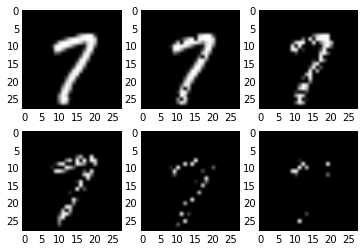

In [17]:
%pylab
%matplotlib inline

train_dp.reset()
x, t = train_dp.next()
img = x[0].reshape(28,28)
pds = [0.9, 0.7, 0.5, 0.2, 0.1]
imgs = [None] * (len(pds)+1)
imgs[0] = img

for i, pd in enumerate(pds):
    d = rng.binomial(1, pd, img.shape)
    imgs[i + 1] = d*img

fig, ax = plt.subplots(2,3)
ax[0, 0].imshow(imgs[0], cmap=cm.Greys_r)
ax[0, 1].imshow(imgs[1], cmap=cm.Greys_r)
ax[0, 2].imshow(imgs[2], cmap=cm.Greys_r)
ax[1, 0].imshow(imgs[3], cmap=cm.Greys_r)
ax[1, 1].imshow(imgs[4], cmap=cm.Greys_r)
ax[1, 2].imshow(imgs[5], cmap=cm.Greys_r)


# Exercise 4: Implement Dropout 

Implement dropout regularisation technique. Then for the same initial configuration as in Exercise 1. investigate effectivness of different dropout rates applied to input features and/or hidden layers. Start with $p_{inp}=0.5$ and $p_{hid}=0.5$ and do some search for better settings.

Implementation tips:
* Add a function `fprop_dropout` to `mlp.layers.MLP` class which (on top of `inputs` argument) takes also dropout-related argument(s) and perform dropout forward propagation through the model.
* One also would have to introduce required modificastions to `mlp.optimisers.SGDOptimiser.train_epoch()` function.
* Design and implemnt dropout scheduler in a similar way to how learning rates are handled (that is, allowing for some implementation dependent schedule which is kept independent of implementation in `mlp.optimisers.SGDOptimiser.train()`). 
   +  For this exercise implement only fixed dropout scheduler - `DropoutFixed`, but implementation should allow to easily add other schedules in the future. 
   +  Dropout scheduler of any type should return a tuple of two numbers $(p_{inp},\; p_{hid})$, the first one is dropout factor for input features (data-points), and the latter dropout factor for hidden layers (assumed the same for all hidden layers).

In [6]:
%autoreload

import numpy
import logging

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider
from mlp.costs import CECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed, DropoutFixed

logger = logging.getLogger()
logger.setLevel(logging.INFO)
rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 800
learning_rate = 0.5
max_epochs = 50
l1_weight = 0.0
l2_weight = 0.0
cost = CECost()
    
stats = []
layer = 1
for i in xrange(1, 2):

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
    for i in xrange(1, layer):
        logger.info("Stacking hidden layer (%s)" % str(i+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    dp_scheduler = DropoutFixed(0.5, 0.5)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, 
                             dp_scheduler=dp_scheduler,
                             l1_weight=l1_weight, 
                             l2_weight=l2_weight)

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    stats.append((tr_stats, valid_stats, (tst_cost, tst_accuracy)))

ERROR: Line magic function `%autoreload` not found.
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.624. Accuracy is 8.60%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.554. Accuracy is 9.84%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 3.491. Accuracy is 47.90%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.969. Accuracy is 65.87%
INFO:mlp.optimisers:Epoch 1: Took 11 seconds. Training speed 220 pps. Validation speed 1466 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 1.039. Accuracy is 66.50%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.494. Accuracy is 85.09%
INFO:mlp.optimisers:Epoch 2: Took 11 seconds. Training speed 216 pps. Validation speed 1506 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.788. Accuracy is 76.10%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.429. Accuracy is 87.25%
INFO:mlp.optimisers:Epoch 3: Took 12 seconds. Training speed 205 p